In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
data_set_dir = '/content/drive/MyDrive/CVPR/Face Mask Dataset'
train_data_dir = os.path.join(data_set_dir, 'Train' )
test_data_dir = os.path.join(data_set_dir, "Test")
validation_data_dir = os.path.join(data_set_dir, "Validation")

In [ ]:
CATEGORIES = []
for i in os.listdir(train_data_dir):
  CATEGORIES.append(i)
print(CATEGORIES)

['WithMask', 'WithoutMask']


In [ ]:
import matplotlib.pyplot as plt
import cv2

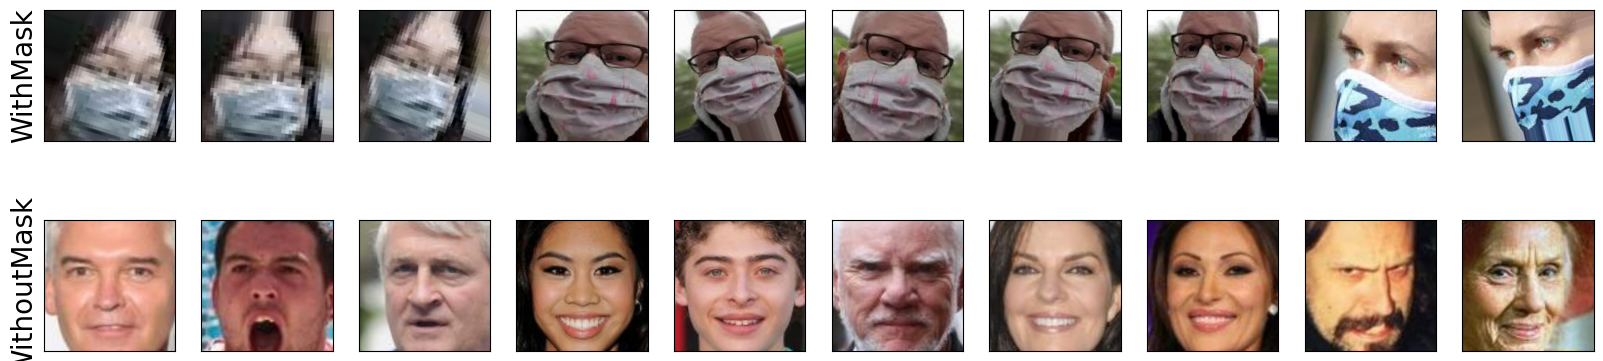

In [ ]:

i = 0
plt.figure(figsize=(20,5))
for c in CATEGORIES:
  path = os.path.join(train_data_dir,c)
  for img in os.listdir(path):
    plt.subplot(2,10,i+1)
    img_arr = plt.imread(os.path.join(path,img))
    img_arr = cv2.resize(img_arr, (227,227))
    # img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BRG2RGB)
    plt.imshow(img_arr)
    if i%10 ==0:
      plt.ylabel(c, size=20)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i%10 == 0:
      break

plt.show()

In [ ]:
train_data = []
i = 0;
for c in CATEGORIES:
  path = os.path.join(train_data_dir,c)
  for img in os.listdir(path):
    img_arr = plt.imread(os.path.join(path,img))
    img_arr = cv2.resize(img_arr, (227,227))
    train_data.append([img_arr, CATEGORIES.index(c)])
    i = i +1
    if i % 1000 == 0:
      break
print(len(train_data))

2000


In [ ]:
valid_data = []
i = 0;
for c in CATEGORIES:
  path = os.path.join(validation_data_dir,c)
  for img in os.listdir(path):
    img_arr = plt.imread(os.path.join(path,img))
    img_arr = cv2.resize(img_arr, (227,227))
    valid_data.append([img_arr, CATEGORIES.index(c)])
    i = i +1
    if i % 200 == 0:
      break
print(len(valid_data))

400


In [ ]:
test_data = []
i = 0;
for c in CATEGORIES:
  path = os.path.join(test_data_dir,c)
  for img in os.listdir(path):
    img_arr = plt.imread(os.path.join(path,img))
    img_arr = cv2.resize(img_arr, (227,227))
    test_data.append([img_arr, CATEGORIES.index(c)])
    i = i +1
    if i % 200 == 0:
      break
print(len(test_data))

400


In [ ]:
import random
random.shuffle(train_data)
random.shuffle(test_data)
random.shuffle(valid_data)

# train_data = train_data[:1000]
# test_data = test_data[:200]
# valid_data = valid_data[:200]

In [ ]:
import numpy as np

In [ ]:
X_train = []
Y_train = []
i = 0
for img, label in train_data:
  X_train.append(img)
  Y_train.append(label)
X_train = (np.array(X_train)*255).astype('float32').reshape(-1,227,227,3)
Y_train = np.array(Y_train)
print(X_train.shape, Y_train.shape)

(2000, 227, 227, 3) (2000,)


In [ ]:
X_valid = []
Y_valid = []
for img, label in valid_data:
  X_valid.append(img)
  Y_valid.append(label)
X_valid = (np.array(X_valid)*255).astype('float32').reshape(-1,227,227,3)
Y_valid = np.array(Y_valid)

print(X_valid.shape, Y_valid.shape)

(400, 227, 227, 3) (400,)


In [ ]:
X_test = []
Y_test = []
for img, label in test_data:
  X_test.append(img)
  Y_test.append(label)
X_test = (np.array(X_test)*255).astype('float32').reshape(-1,227,227,3)
Y_test = np.array(Y_test)

print(X_test.shape, Y_test.shape)

(400, 227, 227, 3) (400,)


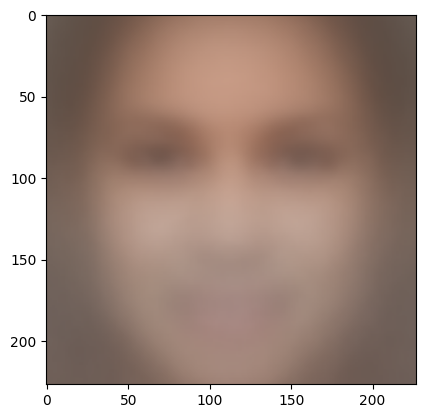

In [ ]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    keras.Input(shape=X_train.shape[1:]),
    layers.Conv2D(filters=96, kernel_size=(11,11),strides=(4,4), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=256, kernel_size=(5,5),strides=(1,1), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=384, kernel_size=(3,3),strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=384, kernel_size=(3,3),strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=(3,3),strides=(1,1), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(units=4096, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=4096, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    layers.Dense(units=1, activation='sigmoid')

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                        

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=['accuracy']
)

In [ ]:
h = model.fit(x=X_train, y=Y_train, epochs=50, batch_size=64, validation_data=(X_valid, Y_valid))

Epoch 1/50
32/32 [==============================] - 23s 139ms/step - loss: 0.3508 - accuracy: 0.8480 - val_loss: 0.6778 - val_accuracy: 0.5025
Epoch 2/50
32/32 [==============================] - 3s 99ms/step - loss: 0.1157 - accuracy: 0.9600 - val_loss: 0.4540 - val_accuracy: 0.8225
Epoch 3/50
32/32 [==============================] - 3s 90ms/step - loss: 0.0676 - accuracy: 0.9770 - val_loss: 0.3071 - val_accuracy: 0.9450
Epoch 4/50
32/32 [==============================] - 3s 89ms/step - loss: 0.0450 - accuracy: 0.9885 - val_loss: 0.1993 - val_accuracy: 0.9625
Epoch 5/50
32/32 [==============================] - 3s 86ms/step - loss: 0.0431 - accuracy: 0.9880 - val_loss: 0.1381 - val_accuracy: 0.9825
Epoch 6/50
32/32 [==============================] - 3s 109ms/step - loss: 0.0187 - accuracy: 0.9975 - val_loss: 0.0920 - val_accuracy: 0.9825
Epoch 7/50
32/32 [==============================] - 3s 92ms/step - loss: 0.0141 - accuracy: 0.9990 - val_loss: 0.0786 - val_accuracy: 0.9725
Epoch 8/50

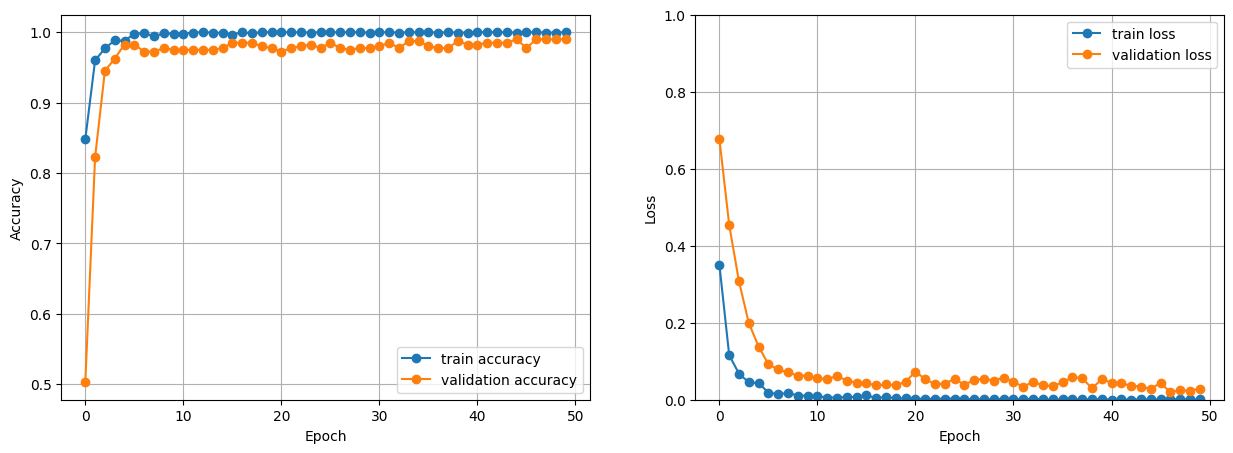

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 20ms/step - loss: 0.0607 - accuracy: 0.9825


[0.06073767691850662, 0.9825000166893005]

In [ ]:
test_img = X_test[50]
predictions = model.predict(np.array([test_img]))
binary_prediction = (predictions > 0.5).astype(int)
print(binary_prediction)
print(Y_test[50])

1/1 [==============================] - 0s 36ms/step
[[1]]
1


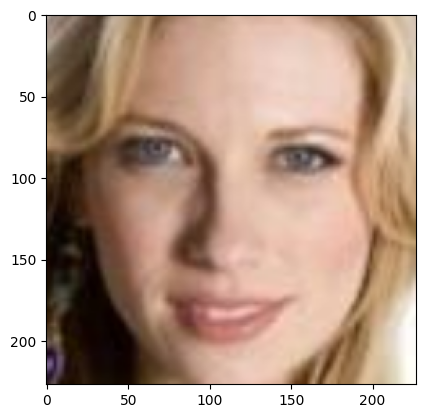

In [ ]:
plt.imshow(X_test[50].astype('uint8'))

In [ ]:
model.save('/content/drive/MyDrive/CVPR/my_model.h5')